In [6]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [7]:
# read data from "coherence_trial_dataset.csv"
df = pd.read_csv("coherence_trial_dataset.csv")
df

,timestamp,baseline_hrv,hrv,text
0,2025-08-20T10:00:00Z,75,65,"I think I can handle this, but I feel nervous."
1,2025-08-20T10:05:00Z,72,74,I feel confident about the next step.
2,2025-08-20T10:10:00Z,76,60,Maybe we should wait and double-check.
3,2025-08-20T10:15:00Z,80,79,I’m certain this is the right direction.
4,2025-08-20T10:20:00Z,77,65,Not sure if this will work out as planned.
5,2025-08-20T10:25:00Z,74,75,Everything feels balanced and steady.
6,2025-08-20T10:30:00Z,73,68,I might need more time to prepare.
7,2025-08-20T10:35:00Z,78,82,I feel strong and ready to go.
8,2025-08-20T10:40:00Z,76,70,I’m hesitant — maybe we should slow down.
9,2025-08-20T10:45:00Z,75,77,I feel focused and aligned with the goal.


In [14]:
df['sample_id'] = range(1, len(df) + 1)

# Calculate HRV differences
df['hrv_abs_diff'] = df['hrv'] - df['baseline_hrv']
df['hrv_rel_diff_pct'] = ((df['hrv'] - df['baseline_hrv']) / df['baseline_hrv'] * 100).round(1)

# Basic text analysis
df['word_count'] = df['text'].str.split().str.len()

print("=== HRV DATA ANALYSIS ===\n")

# Summary statistics
print("SUMMARY STATISTICS")
print(f"Samples: {len(df)}")
print(f"Baseline HRV: {df['baseline_hrv'].min()}-{df['baseline_hrv'].max()} (mean: {df['baseline_hrv'].mean():.1f})")
print(f"Actual HRV: {df['hrv'].min()}-{df['hrv'].max()} (mean: {df['hrv'].mean():.1f})")
print(f"Absolute difference: {df['hrv_abs_diff'].min()} to {df['hrv_abs_diff'].max()}")
print(f"Relative difference: {df['hrv_rel_diff_pct'].min()}% to {df['hrv_rel_diff_pct'].max()}%")
print(f"Text length: {df['word_count'].min()}-{df['word_count'].max()} words\n")

=== HRV DATA ANALYSIS ===

SUMMARY STATISTICS
Samples: 10
Baseline HRV: 72-80 (mean: 75.6)
Actual HRV: 60-82 (mean: 71.5)
Absolute difference: -16 to 4
Relative difference: -21.1% to 5.1%
Text length: 5-10 words



In [15]:
# Detailed sample breakdown
print("SAMPLE-BY-SAMPLE BREAKDOWN")
print("-" * 90)
print(f"{'ID':<3} {'Baseline':<8} {'HRV':<5} {'Abs Diff':<8} {'Rel Diff':<8} {'Text':<50}")
print("-" * 90)

for _, row in df.iterrows():
    print(f"{row['sample_id']:<3} {row['baseline_hrv']:<8} {row['hrv']:<5} "
          f"{row['hrv_abs_diff']:>+8} {row['hrv_rel_diff_pct']:>+7.1f}% "
          f"{row['text'][:47]:<50}")

print("-" * 90)

# Identify patterns
print("\nPATTERN ANALYSIS")

# Rank samples by deviation
sorted_samples = df.sort_values('hrv_rel_diff_pct')

print(f"Most negative deviations:")
for _, row in sorted_samples.head(3).iterrows():
    print(f"  • Sample {row['sample_id']}: {row['hrv_rel_diff_pct']:+.1f}% - '{row['text']}'")

print(f"Most positive deviations:")
for _, row in sorted_samples.tail(3).iterrows():
    print(f"  • Sample {row['sample_id']}: {row['hrv_rel_diff_pct']:+.1f}% - '{row['text']}'")

SAMPLE-BY-SAMPLE BREAKDOWN
------------------------------------------------------------------------------------------
ID  Baseline HRV   Abs Diff Rel Diff Text                                              
------------------------------------------------------------------------------------------
1   75       65         -10   -13.3% I think I can handle this, but I feel nervous.    
2   72       74          +2    +2.8% I feel confident about the next step.             
3   76       60         -16   -21.1% Maybe we should wait and double-check.            
4   80       79          -1    -1.2% I’m certain this is the right direction.          
5   77       65         -12   -15.6% Not sure if this will work out as planned.        
6   74       75          +1    +1.4% Everything feels balanced and steady.             
7   73       68          -5    -6.8% I might need more time to prepare.                
8   78       82          +4    +5.1% I feel strong and ready to go.                    

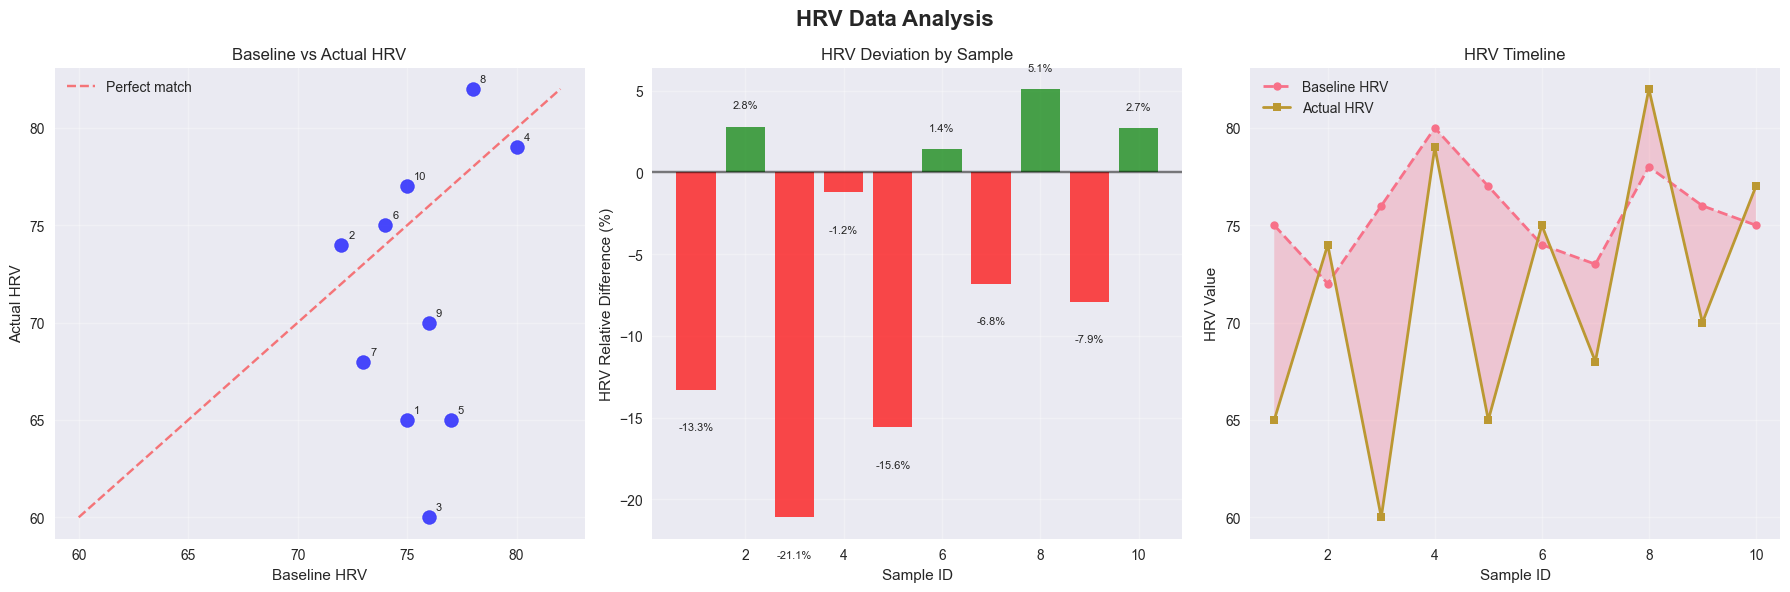


🎯 KEY OBSERVATIONS:
1. HRV deviations range from -21.1% to 5.1%
2. 6 samples have negative deviations (below baseline)
3. 4 samples have positive deviations (above baseline)
4. Largest deviation: -21.1%
5. Text length is consistent (5-10 words)


In [16]:
# Create visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('HRV Data Analysis', fontsize=16, fontweight='bold')

# 1. Baseline vs Actual HRV (scatter plot)
axes[0].scatter(df['baseline_hrv'], df['hrv'], c='blue', s=100, alpha=0.7)
# Add diagonal line for reference
min_val, max_val = min(df['baseline_hrv'].min(), df['hrv'].min()), max(df['baseline_hrv'].max(), df['hrv'].max())
axes[0].plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.5, label='Perfect match')
axes[0].set_xlabel('Baseline HRV')
axes[0].set_ylabel('Actual HRV')
axes[0].set_title('Baseline vs Actual HRV')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Add sample labels
for _, row in df.iterrows():
    axes[0].annotate(f"{row['sample_id']}", (row['baseline_hrv'], row['hrv']), 
                      xytext=(5, 5), textcoords='offset points', fontsize=8)

# 2. HRV Relative Difference by Sample (bar chart)
colors = ['red' if x < 0 else 'green' for x in df['hrv_rel_diff_pct']]
bars = axes[1].bar(df['sample_id'], df['hrv_rel_diff_pct'], color=colors, alpha=0.7)
axes[1].axhline(y=0, color='black', linestyle='-', alpha=0.5)
axes[1].set_xlabel('Sample ID')
axes[1].set_ylabel('HRV Relative Difference (%)')
axes[1].set_title('HRV Deviation by Sample')
axes[1].grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, df['hrv_rel_diff_pct']):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + (1 if height >= 0 else -2),
                  f'{value:.1f}%', ha='center', va='bottom' if height >= 0 else 'top', fontsize=8)

# 3. Timeline view
axes[2].plot(df['sample_id'], df['baseline_hrv'], 'o--', label='Baseline HRV', linewidth=2, markersize=6)
axes[2].plot(df['sample_id'], df['hrv'], 's-', label='Actual HRV', linewidth=2, markersize=6)
axes[2].fill_between(df['sample_id'], df['baseline_hrv'], df['hrv'], alpha=0.3)
axes[2].set_xlabel('Sample ID')
axes[2].set_ylabel('HRV Value')
axes[2].set_title('HRV Timeline')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n🎯 KEY OBSERVATIONS:")
print(f"1. HRV deviations range from {df['hrv_rel_diff_pct'].min():.1f}% to {df['hrv_rel_diff_pct'].max():.1f}%")
print(f"2. {len(df[df['hrv_rel_diff_pct'] < 0])} samples have negative deviations (below baseline)")
print(f"3. {len(df[df['hrv_rel_diff_pct'] > 0])} samples have positive deviations (above baseline)")
print(f"4. Largest deviation: {df.loc[df['hrv_rel_diff_pct'].abs().idxmax(), 'hrv_rel_diff_pct']:.1f}%")
print(f"5. Text length is consistent ({df['word_count'].min()}-{df['word_count'].max()} words)")